<a href="https://colab.research.google.com/github/Sobiii/MSc_Project-2023/blob/main/Twitter_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Twitter dataset

In [7]:
# Importing packages, libraries and modules
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import string
from nltk.util import ngrams

In [13]:
# Twitter training data
twitter_train = pd.read_csv('TWITTER-train.csv')
twitter_train.head()

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative


In [14]:
# Twitter testing data
twitter_test = pd.read_csv('TWITTER-test.csv')
twitter_test.head()

,tweets,class
0,no one ever predicted this was going to happen...,figurative
1,@Stooshie its as closely related as Andrews or...,figurative
2,I find it ironic when Vegans say they love foo...,figurative
3,Quick rt that throwing money vine I've not see...,figurative
4,"yep, keep adding me to your #devops lists.... ...",figurative


In [12]:
# Combining training and testing datasets to form a larger dataset
twitter_data = pd.concat([twitter_train , twitter_test ])
twitter_data

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
8123,Why yes I will totally submit my photos to a s...,sarcasm
8124,Test on a Saturday! Thank you uni! #sarcasm @ ...,sarcasm
8125,Listening to @StephenKing's Misery isn't at al...,sarcasm
8126,@mmcpatt There you go being kind again #sarcas...,sarcasm


# Data Cleaning - Removing Missing Data

In [15]:
# Checking for NaN/missing values in the training data
missing_data = twitter_data.isnull()
missing_data= twitter_data[twitter_data.isnull().any(axis=1)]
missing_data.head()

,tweets,class
70,Oh Scotland's only conservative MP is only a f...,NaN
971,I love going to work,NaN
2116,I have majority of white followers and am foll...,NaN
3518,My next boyfriend will be @JasonPLondon &lt;3😄😉,NaN
3519,NaN,NaN


In [16]:
# Checking the number of datapoints with missing values
print('The number of datapoints with missing values is:',len(missing_data))

The number of datapoints with missing values is: 9


In [18]:
# Removing rows with missing data
twitter_data = pd.concat([twitter_data, missing_data, missing_data]).drop_duplicates(keep=False)
twitter_data

,tweets,class
0,Be aware dirty step to get money #staylight ...,figurative
1,#sarcasm for #people who don't understand #diy...,figurative
2,@IminworkJeremy @medsingle #DailyMail readers ...,figurative
3,@wilw Why do I get the feeling you like games?...,figurative
4,-@TeacherArthurG @rweingarten You probably jus...,figurative
...,...,...
8123,Why yes I will totally submit my photos to a s...,sarcasm
8124,Test on a Saturday! Thank you uni! #sarcasm @ ...,sarcasm
8125,Listening to @StephenKing's Misery isn't at al...,sarcasm
8126,@mmcpatt There you go being kind again #sarcas...,sarcasm


# Exploratory Data Analysis

## Checking Class Distributions

In [21]:
# Checking whether the data is balanced
print('The dataset is already balanced:')
twitter_data['class'].value_counts()

The dataset is already balanced:


figurative    23275
irony         22978
sarcasm       22781
regular       20414
Name: class, dtype: int64

The dataset is already balanced however for the purpose of my study I need the dataset to be both balanced and contain approximately equal parts sarcastic and non-sarcastic tweets. I will therefore be removing data with the irony and figurative class labels.

In [23]:
# Removing iorony and figurative tweets
twitter_data = twitter_data[~twitter_data['class'].isin(['figurative', 'irony'])]
twitter_data

,tweets,class
42132,New #quote : It's both a blessing and a curse ...,regular
42133,"Daddy Uncle Bubba (#life, love, loss, #laughte...",regular
42134,Ayvee - Where Im From on #SoundCloud #late #ni...,regular
42135,#late starting #dinner #tonight but here is wh...,regular
42136,@Trillakayy__ happy birthdayyyyy #late 😅,regular
...,...,...
8123,Why yes I will totally submit my photos to a s...,sarcasm
8124,Test on a Saturday! Thank you uni! #sarcasm @ ...,sarcasm
8125,Listening to @StephenKing's Misery isn't at al...,sarcasm
8126,@mmcpatt There you go being kind again #sarcas...,sarcasm


## Analysis of average sarcastic and non-sarcastic tweet length

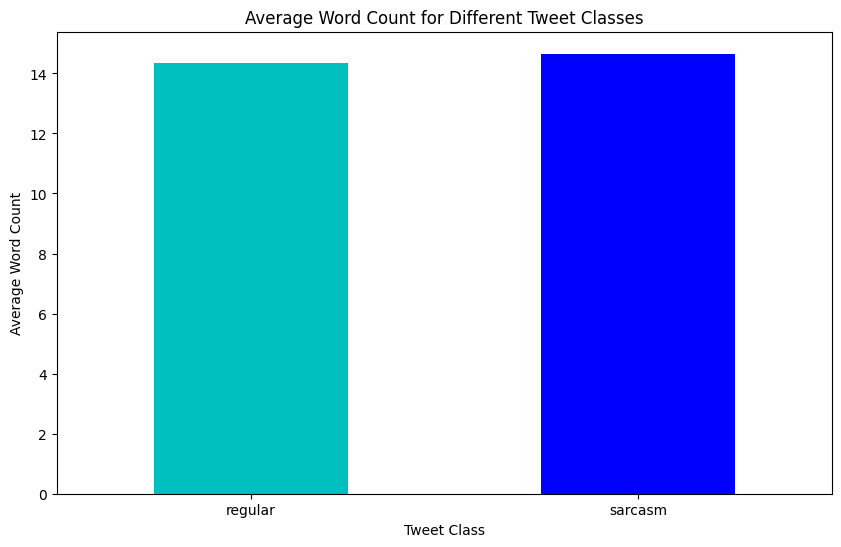

The average word count is:


class
regular    14.348927
sarcasm    14.655283
Name: word_count, dtype: float64

In [28]:
# Create the word_count column
twitter_data = twitter_data.copy()
twitter_data['word_count'] = twitter_data['tweets'].apply(lambda x: len(str(x).split()))

# Group by class and calculate the mean word count
mean_word_counts = twitter_data.groupby('class')['word_count'].mean()

# Plot the graph
plt.figure(figsize=(10,6))
mean_word_counts.plot(kind='bar', color=['c', 'b'])
plt.title('Average Word Count for Different Tweet Classes')
plt.xlabel('Tweet Class')
plt.ylabel('Average Word Count')
plt.xticks(rotation=0)
plt.show()

print('The average word count is:')
mean_word_counts

## Histograms of wordcount distributions by class

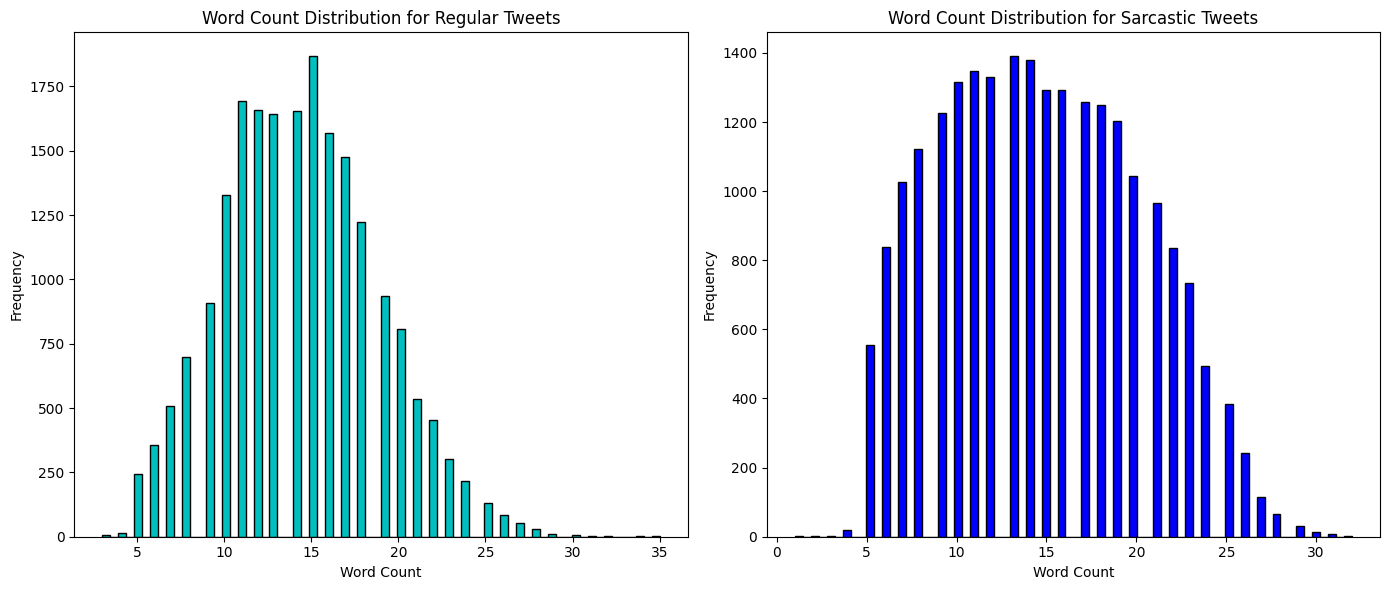

In [38]:
# Separate regular and sarcastic tweets
regular_tweets = twitter_data[twitter_data['class'] == 'regular']
sarcastic_tweets = twitter_data[twitter_data['class'] == 'sarcasm']
plt.figure(figsize=(14,6))

# Plot histogram for regular tweets
plt.subplot(1, 2, 1)
plt.hist(regular_tweets['tweets'].apply(lambda x: len(str(x).split())), bins=70, color='c', edgecolor='black')
plt.title('Word Count Distribution for Regular Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

# Plot histogram for sarcastic tweets
plt.subplot(1, 2, 2)
plt.hist(sarcastic_tweets['tweets'].apply(lambda x: len(str(x).split())), bins=70, color='b', edgecolor='black')
plt.title('Word Count Distribution for Sarcastic Tweets')
plt.xlabel('Word Count')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Histogram of wordcount distribution

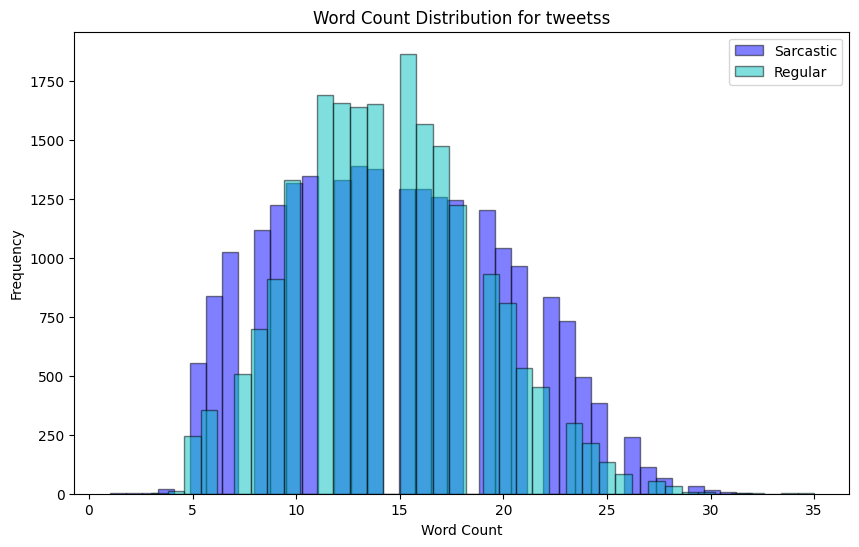

In [39]:
# Plot histogram for sarcastic comments
plt.figure(figsize=(10,6))
plt.hist(sarcastic_tweets['word_count'], bins=40, color='b', alpha=0.5, label='Sarcastic', edgecolor='black')

# Plot histogram for non-sarcastic comments
plt.hist(regular_tweets['word_count'], bins=40, color='c', alpha=0.5, label='Regular', edgecolor='black')

plt.title('Word Count Distribution for tweetss')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [40]:
# sarcastic_tweets
sarcastic_tweets.describe()

,word_count
count,22781.000000
mean,14.655283
std,5.522656
min,1.000000
25%,10.000000
50%,14.000000
75%,19.000000
max,32.000000


In [42]:
# regular_tweets
regular_tweets.describe()

,word_count
count,20414.000000
mean,14.348927
std,4.441169
min,3.000000
25%,11.000000
50%,14.000000
75%,17.000000
max,35.000000


## Mode Wordcount

In [43]:
# Mode for word count of sarcastic comments
mode_sarcastic = sarcastic_tweets['word_count'].mode()[0]

# Mode for word count of non-sarcastic comments
mode_regular = regular_tweets['word_count'].mode()[0]

print(f"The mode of the word count for sarcastic tweets is: {mode_sarcastic}")
print(f"The mode of the word count for regular tweets is: {mode_regular}")

The mode of the word count for sarcastic tweets is: 13
The mode of the word count for regular tweets is: 15


# My Observations:

Based on the given Exploratory Data Analysis (EDA) for a Twitter dataset divided into 'sarcasm' and 'regular' classes, here's a summary of the findings:

- The average word count for sarcastic tweets is slightly higher than regular tweets, with mean values being 14.65 and 14.35, respectively. This could imply that sarcastic tweets tend to be a bit wordier than their regular counterparts.

- The distribution of word count for both categories also shows some interesting aspects. In the case of sarcastic tweets, the word count ranges from 1 to 32, with a standard deviation of 5.52. For regular tweets, the range is from 3 to 35, with a lower standard deviation of 4.44. This suggests that sarcastic tweets have a more diverse word count and are more spread out from the mean compared to regular tweets. The latter are more tightly packed around their mean value, indicating a lesser variance in word count.

- For the quartiles, 50% of the sarcastic tweets have a word count ranging from 10 to 19 words, whereas 50% of the regular tweets range from 11 to 17 words. This suggests that while the central tendency of both types of tweets is similar, sarcastic tweets can be both shorter and longer than regular tweets, further confirming their greater variability.

- Interestingly, the mode, or most common word count, differs for the two classes. It's 13 for sarcastic tweets and 15 for regular tweets. This points out that while sarcastic tweets on average are slightly longer, the most frequent length of a sarcastic tweet is less than that of a regular tweet.

In conclusion, although the mean word counts for both classes are quite similar, there are differences in their distributions. Sarcasm on Twitter tends to employ a wider range of word counts, with greater variability. Meanwhile, regular tweets tend to have more consistency in their word length. Further research might delve into whether these differences in word count could play a significant role in sarcasm detection algorithms or influence the effectiveness of different types of communication on Twitter.

# Creating a Word Cloud

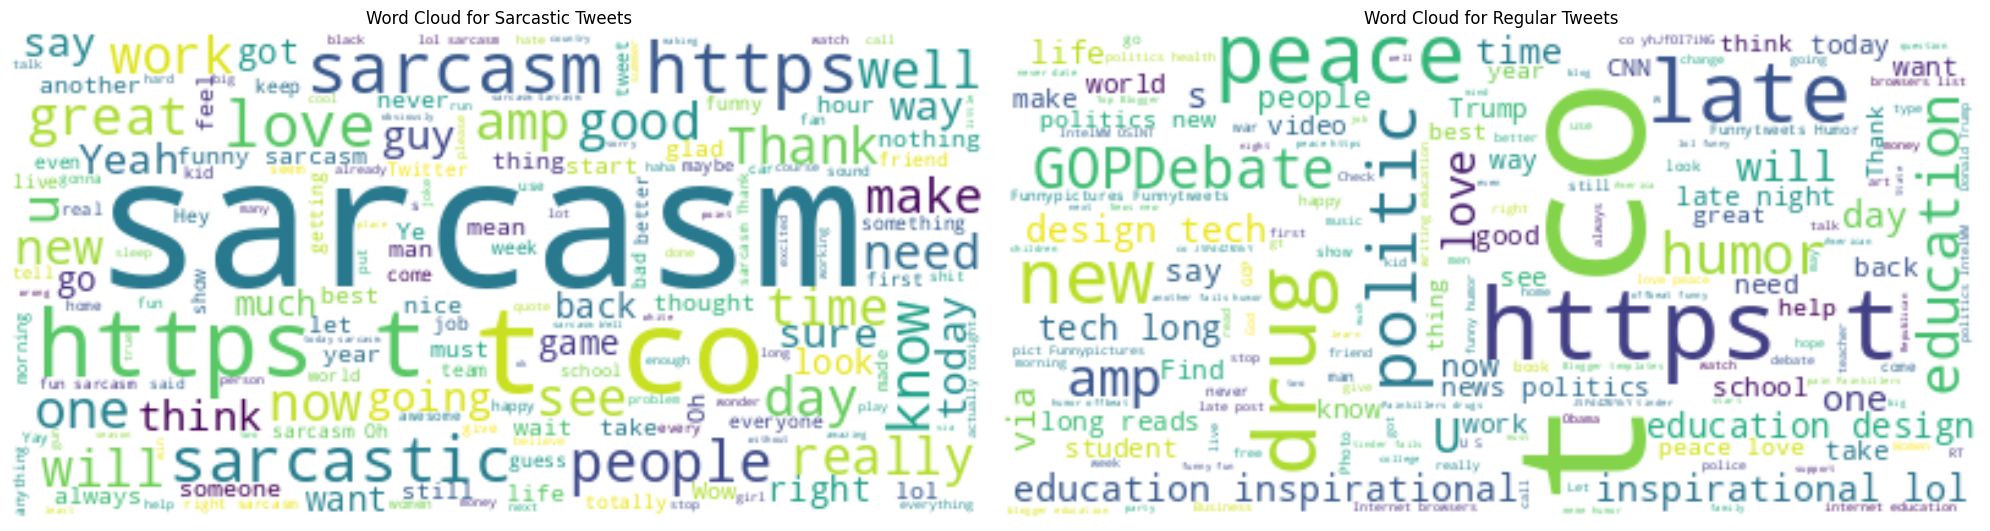

In [46]:
# Combine all sarcastic comments into one large text
text_sarcastic = " ".join(comment for comment in sarcastic_tweets.tweets)

# Combine all non-sarcastic comments into one large text
text_regular = " ".join(comment for comment in regular_tweets.tweets)

# Generate the word clouds
wordcloud_sarcastic = WordCloud(background_color="white").generate(text_sarcastic)
wordcloud_non_sarcastic = WordCloud(background_color="white").generate(text_regular)

# Display the word clouds
plt.figure(figsize=(20, 10))

plt.subplot(1, 2, 1)
plt.imshow(wordcloud_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Sarcastic Tweets')
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(wordcloud_non_sarcastic, interpolation='bilinear')
plt.title('Word Cloud for Regular Tweets')
plt.axis("off")

plt.tight_layout()
plt.show()

In [47]:
# Finding the Top10 common and least common terms
nltk.download('punkt')
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function to preprocess and tokenize text
def process_text(text):
    text = text.lower()
    text = "".join([char for char in text if char not in string.punctuation])
    words = word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return words

# Process text and find most common and least common words
def analyze_comments(comments):
    words = process_text(" ".join(comments))
    counter = Counter(words)
    most_common = pd.DataFrame(counter.most_common(10), columns=['word', 'frequency'])
    least_common = pd.DataFrame(counter.most_common()[:-11:-1], columns=['word', 'frequency'])
    return most_common, least_common

most_common_sarcastic, least_common_sarcastic = analyze_comments(sarcastic_tweets['tweets'])
most_common_regular, least_common_regular = analyze_comments(regular_tweets['tweets'])

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [48]:
print("Most common words in sarcastic tweets:")
most_common_sarcastic

Most common words in sarcastic tweets:


,word,frequency
0,sarcasm,21782
1,sarcastic,1362
2,im,1352
3,love,1322
4,like,1166
5,good,964
6,great,950
7,people,923
8,dont,907
9,get,889


In [49]:
print("Least common words in sarcastic tweets:")
least_common_sarcastic

Least common words in sarcastic tweets:


,word,frequency
0,minn,1
1,mmcpatt,1
2,disconcerting,1
3,stephenkings,1
4,httpstcowkf3wpoghd,1
5,griffith,1
6,photographers,1
7,lovewins,1
8,excitng,1
9,sweetfreedom29,1


In [50]:
print("Most common words in regular tweets:")
most_common_regular

Most common words in regular tweets:


,word,frequency
0,peace,3257
1,news,3222
2,late,3035
3,education,3015
4,drugs,2886
5,politics,2828
6,humor,2816
7,gopdebate,1589
8,funny,944
9,amp,906


In [51]:
print("Least common words in regular tweets:")
least_common_regular

Least common words in regular tweets:


,word,frequency
0,httptconkf5jvzyzu,1
1,socialmobility,1
2,hides,1
3,httptcowog9rsfs4c,1
4,unicefindia,1
5,viii,1
6,avenged,1
7,dong,1
8,httptcovgahg1opod,1
9,qldmermaid,1


## N-gram Analysis

In [53]:
# Process text and find most common n-grams
def analyze_comments(comments, ngram_range=(1, 3)):
    words = process_text(" ".join(comments))

    results = []
    for n in range(ngram_range[0], ngram_range[1] + 1):
        ngram_counts = Counter(ngrams(words, n))
        most_common = pd.DataFrame(ngram_counts.most_common(10), columns=['ngram', 'frequency'])
        results.append(most_common)

    return results

unigrams_sarcastic, bigrams_sarcastic, trigrams_sarcastic = analyze_comments(sarcastic_tweets['tweets'])
unigrams_regular, bigrams_regular, trigrams_regular = analyze_comments(regular_tweets['tweets'])

In [54]:
print("\nMost common bigrams in sarcastic tweets:")
bigrams_sarcastic


Most common bigrams in sarcastic tweets:


,ngram,frequency
0,"(funny, sarcasm)",338
1,"(sarcasm, love)",310
2,"(sarcasm, oh)",216
3,"(right, sarcasm)",210
4,"(sarcasm, im)",194
5,"(im, sure)",193
6,"(cant, wait)",178
7,"(gon, na)",167
8,"(sarcasm, sarcasm)",161
9,"(fun, sarcasm)",150


In [55]:
print("\nMost common trigrams in sarcastic tweets:")
trigrams_sarcastic


Most common trigrams in sarcastic tweets:


,ngram,frequency
0,"(got, ta, love)",58
1,"(sarcasm, cant, wait)",39
2,"(see, coming, sarcasm)",35
3,"(didnt, see, coming)",31
4,"(sarcasm, im, glad)",28
5,"(sarcasm, got, ta)",27
6,"(sarcasm, love, people)",27
7,"(im, shocked, sarcasm)",25
8,"(much, fun, sarcasm)",25
9,"(cant, wait, see)",23


In [56]:
print("\nMost common bigrams in regular tweets:")
bigrams_regular


Most common bigrams in regular tweets:


,ngram,frequency
0,"(education, inspirational)",465
1,"(inspirational, lol)",461
2,"(design, tech)",417
3,"(education, design)",395
4,"(news, politics)",333
5,"(late, night)",271
6,"(tech, longreads)",240
7,"(lol, …)",237
8,"(politics, news)",207
9,"(peace, love)",201


In [57]:
print("\nMost common trigrams in regular tweets:")
trigrams_regular


Most common trigrams in regular tweets:


,ngram,frequency
0,"(education, inspirational, lol)",461
1,"(education, design, tech)",393
2,"(design, tech, longreads)",240
3,"(inspirational, lol, …)",237
4,"(funnypictures, funnytweets, humor)",193
5,"(pict, funnypictures, funnytweets)",170
6,"(internet, browsers, list)",155
7,"(internet, education, inspirational)",154
8,"(news, politics, intelmm)",119
9,"(politics, intelmm, osint)",119
